# CPyS : A package for efficient computation of the Cyclone Phase Space parameters
Author: Stella Bourdin, stella.bourdin@physics.ox.ac.uk . Please reach out for any question!

## Installation

In [ ]:
# Download the package very simply with pip
pip install CPyS

## Preliminaries
1. You need a csv file which contains your track(s) (`tracks.csv` hereafter, but you can name it as you wish). This csv can be the output of TempestExtremes' StitchNodes, or it can be obtained from TRACK's output with a code similar to the one at the bottom at this page. It needs to contains at least the longitude and the latitude of the points, named `lon` and `lat`. If several tracks are in the file, it is advised to have a `track_id` variable to distinguish among the tracks. Otherwise, the value of $\theta$ and $B$ for the last point of each track will be wrong. If your csv file has any other additional columns, they will be kept through the process, although not used.
2. You need a NetCDF file with the geopotential at several levels from 900 to 300hPa (at least five are recommended) covering the region where your tracks are (`geopt.nc` hereafter, but you can name it as you wish).
3. Use TempestExtremes' NodeFileCompose to obtain snapshots of the geopotential field along the track(s). Use a code similar to that below, adapted to your data:

```
NodeFileCompose \
    --in_nodefile "tracks.csv" \
    --in_nodefile_type SN \
    --in_fmt "(auto)" \
    --in_data "geopt.nc" \
    --out_grid "RAD" \     # Use radial grid for circular snapshots along the tracks
    --dx 0.5 --resx 10  \  # Snapshots dimension along the radial axis : 10 steps every 0.5° = 500km
    --out_data "snaps.nc" \
    --var "z(:)" \      # Change z to the name of the geopt variable in your data.
    --varout "zg" \     # Your snapshots will be named "snap_zg"
    --snapshots \       # Make sure to output individual snapshots
    --latname latitude --lonname longitude \  # Change to the names in your geopt.nc file
    --regional          # Use this option if your geopt.nc file is not global
```

**NB : NodeFileCompose does not output the value of the vertical coordinate. Be careful to change it before using the snapshots with CPyS**

*This example is based on the track of Typhoon Dale. `Dale.csv` contains the track data, and `Dale.nc` contains the snapshots.*

## Loading the data

In [1]:
# Load the csv data using pandas, or your favorite function.
import pandas as pd
track = pd.read_csv("Dale.csv")
track[["track_id", "time", "lon", "lat"]] # Extract of the track file

,track_id,time,lon,lat
0,1277,1996-11-05 00:00:00,150.50,9.00
1,1277,1996-11-05 06:00:00,152.00,10.25
2,1277,1996-11-05 12:00:00,152.25,11.25
3,1277,1996-11-05 18:00:00,151.50,12.00
4,1277,1996-11-06 00:00:00,150.50,11.25
5,1277,1996-11-06 06:00:00,150.50,11.00
6,1277,1996-11-06 12:00:00,150.00,11.75
7,1277,1996-11-06 18:00:00,148.75,11.50
8,1277,1996-11-07 00:00:00,148.75,11.00
9,1277,1996-11-07 06:00:00,147.75,11.25


In [4]:
# Load the snapshots file with xarray
import xarray as xr
snaps = xr.open_dataset("Dale.nc")
#snaps["level"] = [...] # !! Change the vertical variable here if necessary. It must be in Pa.

In [10]:
# Snapshots dimensions
snaps.snap_zg.dims

('snapshot', 'level', 'r', 'az')

In [14]:
# Dimensions
snaps.coords

Coordinates:
  * az       (az) float64 128B 0.0 22.5 45.0 67.5 ... 270.0 292.5 315.0 337.5
  * r        (r) float64 400B 0.1 0.3 0.5 0.7 0.9 1.1 ... 9.1 9.3 9.5 9.7 9.9
  * level    (level) int32 148B 100 200 300 500 700 ... 92500 95000 97500 100000

## Computation of the CPS parameters

In [3]:
from CPyS import compute_CPS_parameters

In [5]:
track_w_CPS_params = compute_CPS_parameters(track, snaps)
track_w_CPS_params[["track_id", "time", "lon", "lat", "theta", "B", "VTL", "VTU"]] # Results!

Computing B...
Level 90000 is taken for 900hPa
Level 60000 is taken for 600hPa

Computing VTL & VTU...


,track_id,time,lon,lat,theta,B,VTL,VTU
0,1277,1996-11-05 00:00:00,150.50,9.00,39.805571,-2.858689,48.728841,36.933898
1,1277,1996-11-05 06:00:00,152.00,10.25,75.963757,-6.972262,74.375981,47.726629
2,1277,1996-11-05 12:00:00,152.25,11.25,135.000000,-10.449450,81.880806,54.397699
3,1277,1996-11-05 18:00:00,151.50,12.00,216.869898,-0.754497,120.169291,116.594427
4,1277,1996-11-06 00:00:00,150.50,11.25,270.000000,11.002904,119.258912,107.699136
5,1277,1996-11-06 06:00:00,150.50,11.00,123.690068,-7.824734,122.372489,105.959700
6,1277,1996-11-06 12:00:00,150.00,11.75,191.309932,-1.379825,142.778913,106.332585
7,1277,1996-11-06 18:00:00,148.75,11.50,270.000000,2.639275,128.205585,116.285513
8,1277,1996-11-07 00:00:00,148.75,11.00,165.963757,3.478431,151.808066,132.191755
9,1277,1996-11-07 06:00:00,147.75,11.25,168.690068,1.628800,157.627609,130.330405


## Plot of the phase space diagram
I have included a simple function to plot the two traditionnal phase space diagrams.

In [5]:
from CPyS import plot_CPS

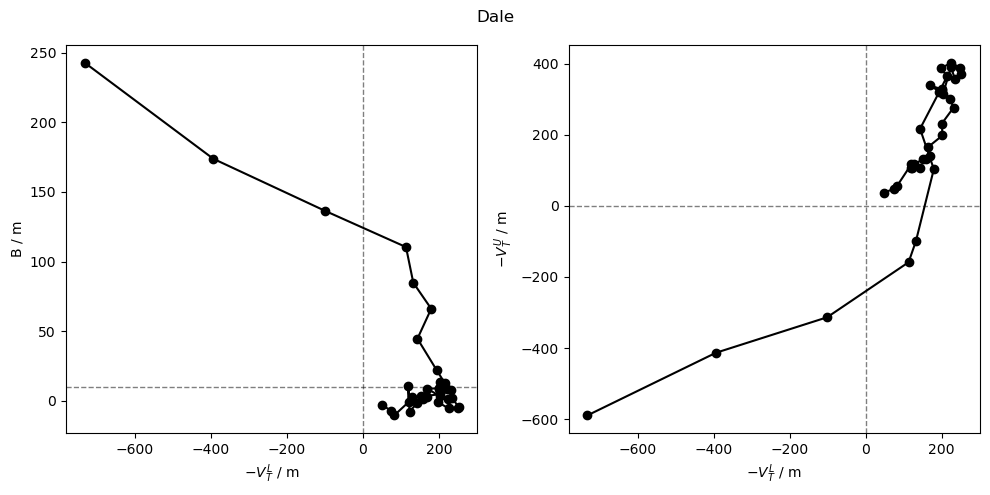

In [8]:
plot_CPS(track_w_CPS_params, title = "Dale")

## Appendix

In [6]:
# Code for reading TRACK files as pd dataframe, which you can then store as csv with tracks.to_csv("file.csv")
def read_TRACKfiles(
    file="tests/TRACK/19501951.dat",
    origin="HRMIP",
    season="19501951",
):
    """
    Parameters
    ----------
    file (str): Path to the TRACK output file
    origin (str): 'ERA5' or 'HRMIP'
    season (str): If None, is read from the data

    Returns
    -------
    pd.DataFrame
        Columns as described in the module header
    """

    # Define parameters according to the file origin
    if origin == "ERA5":
        data_vars = _TRACK_data_vars
        time_format = "calendar"
    else:
        data_vars = _HRMIP_TRACK_data_vars
        time_format = "time_step"

    # Read the TRACK output file
    f = open(file)
    tracks = pd.DataFrame()
    line0 = f.readline()
    line1 = f.readline()
    line2 = f.readline()
    nb_tracks = int(line2.split()[1])
    c = 0
    track_id = 0
    time_step = []
    lon = []
    lat = []
    data = [[]]
    for line in f:
        if line.startswith("TRACK_ID"):
            data = pd.DataFrame(
                np.array(data), columns=data_vars[: np.shape(np.array(data))[1]]
            )
            tracks = pd.concat([
                tracks,
                pd.DataFrame(
                    {
                        "track_id": [track_id] * len(time_step),
                        "time_step": time_step,
                        "lon": lon,
                        "lat": lat,
                    }
                ).join(data)]
            )
            c += 1
            if season == None:
                season = line.split()[-1][:-6]
            track_id = str(season) + "-" + str(c)
            time_step = []
            lon = []
            lat = []
            data = []

        elif line.startswith("POINT_NUM"):
            pass
        else:
            time_step.append(line.split()[0])
            lon.append(float(line.split()[1]))
            lat.append(float(line.split()[2]))
            rest = line.split()[3:]
            mask = np.array(rest) == "&"
            data.append(np.array(rest)[~mask])
    f.close()

    # Format the data
    SH = tracks.lat.mean() < 0
    if SH:
        tracks["track_id"] = "S" + tracks.track_id
        start = np.datetime64(str(int(season) - 1) + "-07-01 00:00:00")
    else:
        tracks["track_id"] = "N" + tracks.track_id
        start = np.datetime64(season + "-01-01 00:00:00")
    if time_format == "calendar":
        tracks["year"] = season
        tracks["month"] = tracks.time_step.str[-6:-4]
        tracks["day"] = tracks.time_step.str[-4:-2]
        tracks["hour"] = tracks.time_step.str[-2:]
        tracks["time"] = get_time(tracks.year, tracks.month, tracks.day, tracks.hour)
        tracks["delta"] = tracks["time"] - np.datetime64(season[-4:] + "-01-01 00")
        tracks["time"] = tracks["delta"] + start
    elif time_format == "time_step":
        tracks["time"] = [
            start + np.timedelta64(ts * 6, "h") for ts in tracks.time_step.astype(int)
        ]
    else:
        print("Please enter a valid time_format")
    time = pd.DatetimeIndex(tracks.time)
    tracks["year"] = time.year
    tracks["month"] = time.month
    tracks["day"] = time.day
    tracks["hour"] = time.hour
    tracks["hemisphere"] = "S" if SH else "N"
    tracks = add_season(tracks)
    tracks["basin"] = get_basin(tracks.lon, tracks.lat)
    if "vor850" in tracks.columns:
        tracks["vor850"] = tracks.vor850.astype(float)
    if "vor_tracked" in tracks.columns:
        tracks["vor_tracked"] = tracks.vor_tracked.astype(float)
    if "slp" not in tracks.columns:
        tracks["slp"] = np.nan
        tracks["sshs"] = np.nan
    else:
        tracks["slp"] = tracks.slp.astype(float)
        tracks["sshs"] = sshs_from_pres(tracks.slp)
    if "wind10" not in tracks.columns:
        tracks["wind10"] = np.nan
    else:
        tracks["wind10"] = tracks.wind10.astype(float)
    tracks["ACE"] = tracks.wind10 ** 2 * 1e-4
    if "wind925" not in tracks.columns:
        tracks["wind925"] = np.nan
    else:
        tracks["wind925"] = tracks.wind925.astype(float)
    return tracks

# Note that you need to define a list of columns that corresponds to your data, such as:
_HRMIP_TRACK_data_vars = [
    "vor_tracked",
    "lon2",
    "lat2",
    "vor850",
    "lon3",
    "lat3",
    "vor700",
    "lon4",
    "lat4",
    "vor600",
    "lon5",
    "lat5",
    "vor500",
    "lon6",
    "lat6",
    "vor250",
    "lon7",
    "lat7",
    "wind10",
]
_TRACK_data_vars = [
    "vor_tracked",
    "lon1",
    "lat1",
    "vor850",
    "lon2",
    "lat2",
    "vor700",
    "lon3",
    "lat3",
    "vor600",
    "lon4",
    "lat4",
    "vor500",
    "lon5",
    "lat5",
    "vor400",
    "lon6",
    "lat6",
    "vor300",
    "lon7",
    "lat7",
    "vor200",
    "lon8",
    "lat8",
    "slp",
    "lon9",
    "lat9",
    "wind925",
    "lon10",
    "lat10",
    "wind10",
]